## Lab Exercise 4
### Loading the dataset

In [112]:
import pandas as pd
data=pd.read_csv('heart.csv')
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [113]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [115]:
string=[]
numeric=[]
boolean=[]
for i in data.columns:
    if data[i].dtype=='O':
        string.append(i)
    else:
        if len(data[i].unique())<3:
            boolean.append(i)
        else:
            numeric.append(i)
print('Non-numeric: ',string)
print('Numeric: ',numeric)
print('Boolean: ',boolean)

Non-numeric:  ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']
Numeric:  ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
Boolean:  ['FastingBS', 'HeartDisease']


In [116]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
for i in string:
    if len(data[i].unique())<3:
       data[i]=le.fit_transform(data[i])
    else:
        data=pd.get_dummies(data,columns=[i])

In [117]:
for i in data.columns:
    if data[i].dtype=='bool':
        data[i]=le.fit_transform(data[i])

In [118]:
for i in numeric:
    data[i]=(data[i]-data[i].mean())/data[i].std()

In [119]:
X=data.drop(columns='HeartDisease')
y=data['HeartDisease']

In [120]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42)

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix,f1_score,roc_auc_score
parameter=[]
accuracy=[]
precision=[]
recall=[]
f1=[]
roc_auc=[]
confusion=[]
for i in [16,512]:
    for j in [0.2,0.5]:
        for k in [32,16]:
            model = Sequential()
            model.add(Dense(i, input_dim=X_train.shape[1], activation='relu'))
            model.add(Dropout(j))
            model.add(Dense(i/2, activation='relu'))
            model.add(Dropout(j))
            model.add(Dense(i/4, activation='relu'))
            model.add(Dropout(j))
            model.add(Dense(1, activation='sigmoid'))
            model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
            model.fit(X_train, y_train, epochs=50, batch_size=k, verbose=1)
            y_pred = (model.predict(X_test) > 0.5).astype(int)
            parameter.append(f'{i}-{j}-{k}')
            accuracy.append(accuracy_score(y_test, y_pred))
            precision.append(precision_score(y_test, y_pred))
            recall.append(recall_score(y_test, y_pred))
            f1.append(f1_score(y_test, y_pred))
            confusion.append(confusion_matrix(y_test, y_pred))
            roc_auc.append(roc_auc_score(y_test, y_pred))

Epoch 1/50
23/23 [==============================] - 0s 670us/step - loss: 0.7450 - accuracy: 0.5218
Epoch 2/50
23/23 [==============================] - 0s 656us/step - loss: 0.6669 - accuracy: 0.5409
Epoch 3/50
23/23 [==============================] - 0s 703us/step - loss: 0.6513 - accuracy: 0.5381
Epoch 4/50
23/23 [==============================] - 0s 630us/step - loss: 0.6346 - accuracy: 0.5858
Epoch 5/50
23/23 [==============================] - 0s 590us/step - loss: 0.6233 - accuracy: 0.5981
Epoch 6/50
23/23 [==============================] - 0s 582us/step - loss: 0.6070 - accuracy: 0.6444
Epoch 7/50
23/23 [==============================] - 0s 627us/step - loss: 0.5892 - accuracy: 0.6853
Epoch 8/50
23/23 [==============================] - 0s 574us/step - loss: 0.5788 - accuracy: 0.6907
Epoch 9/50
23/23 [==============================] - 0s 659us/step - loss: 0.5653 - accuracy: 0.7193
Epoch 10/50
23/23 [==============================] - 0s 591us/step - loss: 0.5455 - accuracy: 0.7452

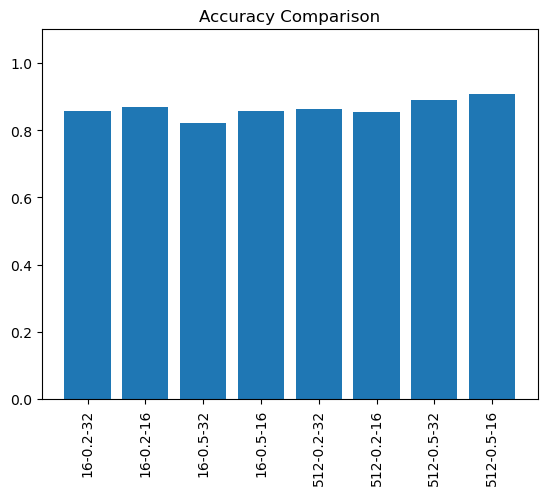

In [128]:
import matplotlib.pyplot as plt
plt.bar(parameter,accuracy)
plt.title('Accuracy Comparison')
plt.xticks(rotation = 90)
plt.ylim(0,1.1)
plt.show()

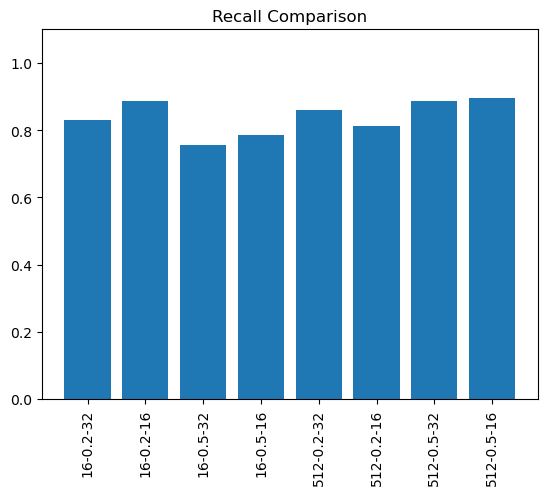

In [129]:
plt.bar(parameter,recall)
plt.title('Recall Comparison')
plt.xticks(rotation = 90)
plt.ylim(0,1.1)
plt.show()

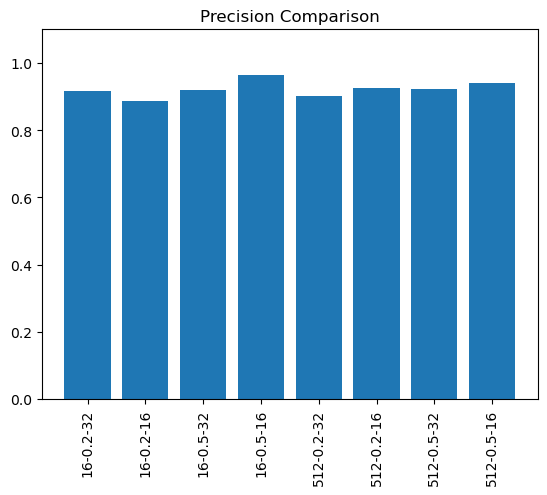

In [130]:
plt.bar(parameter,precision)
plt.title('Precision Comparison')
plt.xticks(rotation = 90)
plt.ylim(0,1.1)
plt.show()

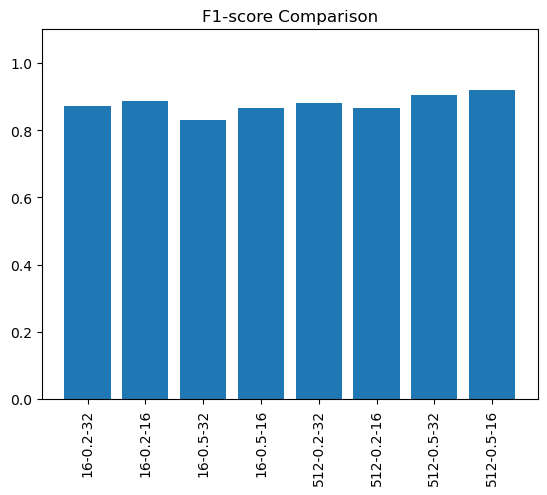

In [131]:
plt.bar(parameter,f1)
plt.title('F1-score Comparison')
plt.xticks(rotation = 90)
plt.ylim(0,1.1)
plt.show()

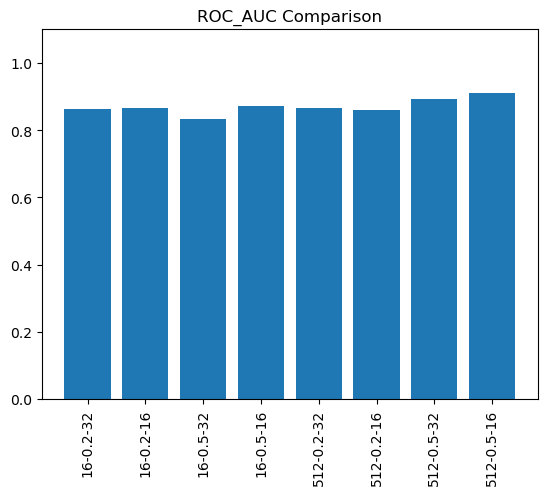

In [132]:
plt.bar(parameter,roc_auc)
plt.title('ROC_AUC Comparison')
plt.xticks(rotation = 90)
plt.ylim(0,1.1)
plt.show()

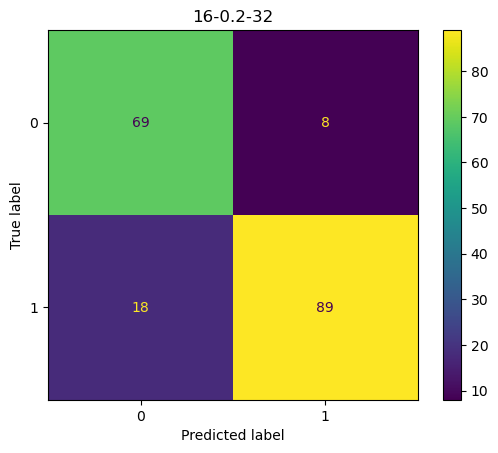

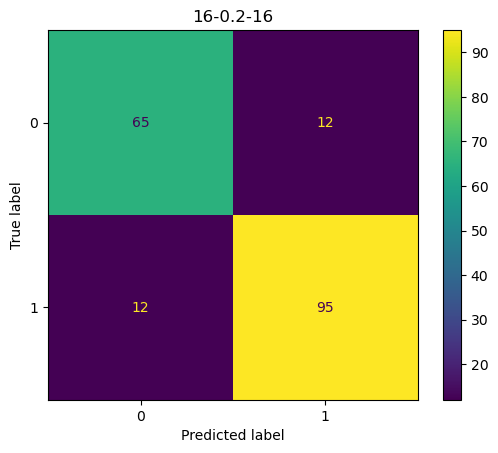

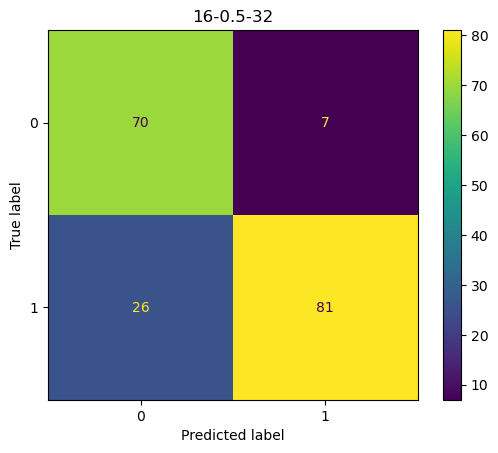

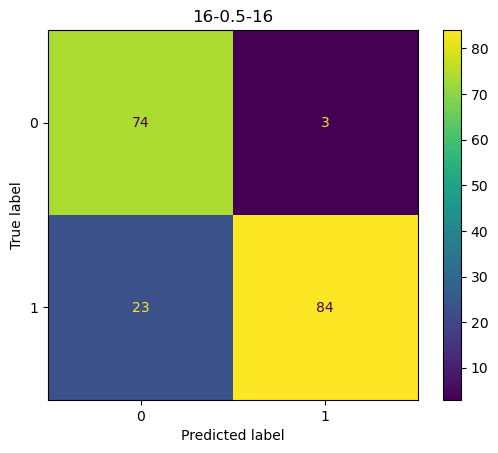

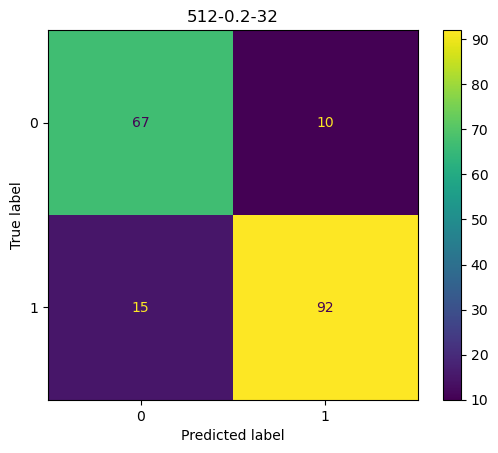

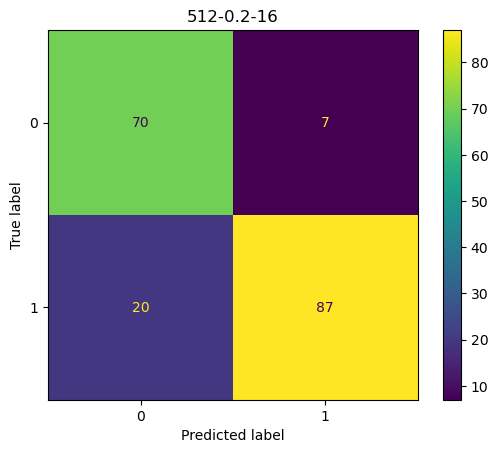

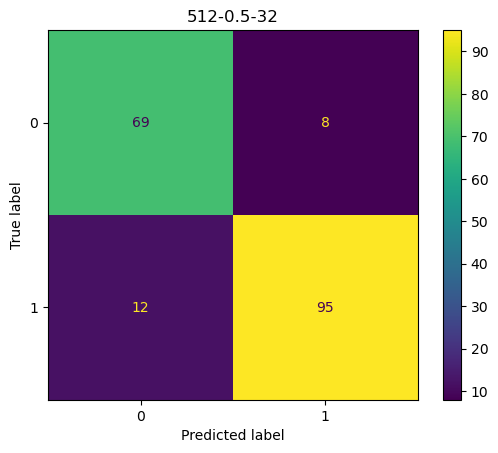

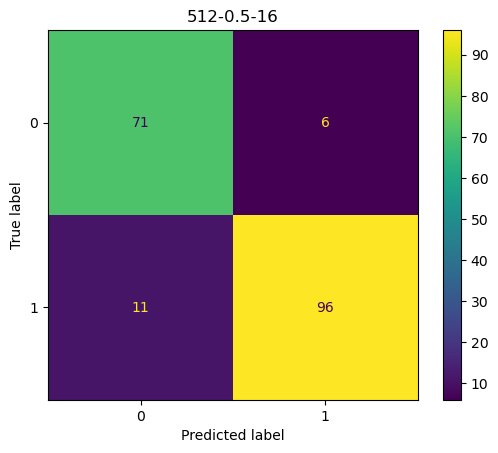

In [136]:
from sklearn.metrics import ConfusionMatrixDisplay
for i in range(len(confusion)):
    ConfusionMatrixDisplay(confusion_matrix=confusion[i]).plot()
    plt.title(parameter[i])
    plt.show()

### END